=======================================================================================

kaggleデータ分析「Titanic - Machine Learning from Disaster」に挑戦。

https://www.kaggle.com/c/titanic/overview

=======================================================================================

In [1]:
#ライブラリのインポート
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#csvデータ読み込み
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [3]:
#各データの確認
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


==============【各カラムについて】==============================================

PassengerID:　乗客ID

Survived: 　　生存結果 ( 0: 死亡,1: 生存)

Pclass: 　　　階級 (1, 2, 3 1がランク高い)

Name: 　　 　 名前

Sex: 　　　　 性別

Age: 　　　　 年齢

SibSp 　　 　 兄弟、配偶者の数

Parch 　　　　両親、子供の数

Ticket 　　　 チケット番号

Fare 　　　　 乗船料金。

Cabin 　　　　部屋番号

Embarked 　　 乗船した港　(C = Cherbourg, Q = Queenstown, S = Southamptonの３種類)

=============================================================================


女性子供かつ階級高い方が生存率高いイメージがあるので、

下記要素が重要になると思われる

 ["Sex"] ,["Age"] ,["Pclass"]は生存率に関係深いと予想。


In [5]:
#trainの生存率確認
print(train["Survived"].mean())
#　1(生存),0(死亡)なので、trainデータ全体の生存率：38.38％


0.3838383838383838


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228B35EA550>,
      dtype=object)

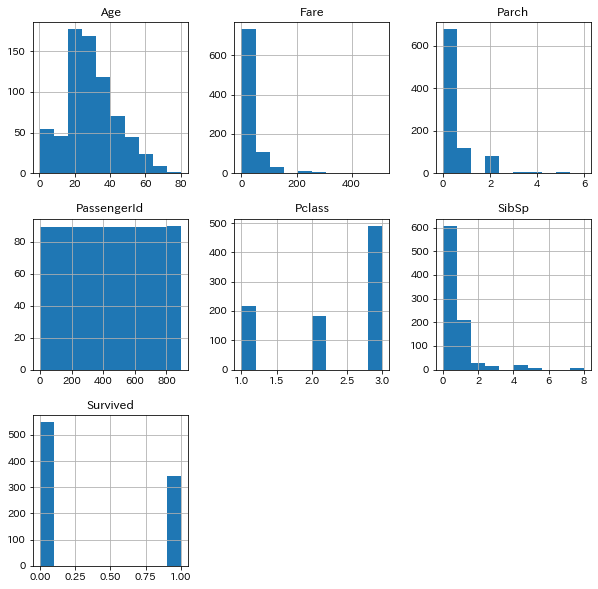

In [6]:
#各項目の値をグラフで表示
train.hist(figsize=(10,10))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


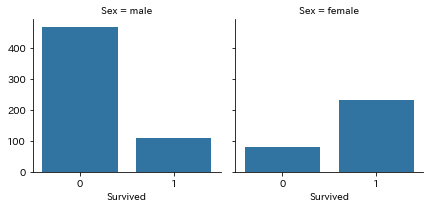

In [7]:
#男女別の生存・死亡数をグラフで表示
grid = sns.FacetGrid(train, col='Sex')
grid.map(sns.countplot, 'Survived')
grid.add_legend()

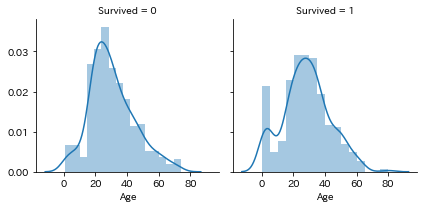

In [8]:
#年齢別の生存・死亡数をグラフで表示
grid = sns.FacetGrid(train, col='Survived')
grid.map(sns.distplot, 'Age')
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


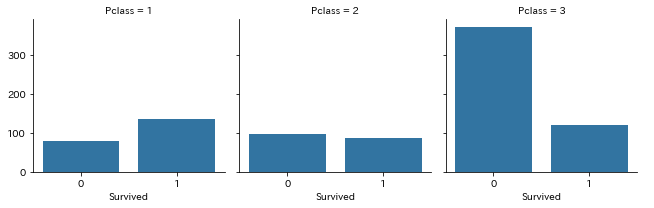

In [9]:
#階級別の生存・死亡数をグラフで表示
grid = sns.FacetGrid(train, col='Pclass')
grid.map(sns.countplot, 'Survived')
grid.add_legend()

In [10]:
#データの前処理

#必要なさそうな項目を削除
train = train.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)
test = test.drop(["Name","Ticket","Cabin"], axis=1)

#欠損値有無,項目の確認
print(train.isnull().any())
print(train.isnull().sum())
print("================================")
print(test.isnull().any())
print(test.isnull().sum())

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
PassengerId    False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare            True
Embarked       False
dtype: bool
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [11]:
#欠損値補完　["Age"]は中央値で、["Fare"],["Cabin"],["Embarked"]は最頻値で補完する
train_Age_ave = train["Age"].median()
test_Age_ave = test["Age"].median()

train["Age"] = train["Age"].fillna(train_Age_ave)
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

test["Age"] = train["Age"].fillna(test_Age_ave)
test["Fare"] = test["Fare"].fillna(test["Fare"].mode()[0])

print(train.isnull().sum())
print(test.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [12]:
#["Sex"],['Embarked']をラベルエンコーディングする
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex']) 
train['Embarked'] = le.fit_transform(train['Embarked']) 
test['Sex'] = le.fit_transform(test['Sex']) 
test['Embarked'] = le.fit_transform(test['Embarked']) 

train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,22.0,0,0,7.8292,1
1,893,3,0,38.0,1,0,7.0000,2
2,894,2,1,26.0,0,0,9.6875,1
3,895,3,1,35.0,0,0,8.6625,2
4,896,3,0,35.0,1,1,12.2875,2


In [13]:
#標準化
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(train[['Age', 'Fare']])
train[['Age', 'Fare']] = std_scale.transform(train[['Age', 'Fare']])

std_scale = StandardScaler().fit(test[['Age', 'Fare']])
test[['Age', 'Fare']] = std_scale.transform(test[['Age', 'Fare']])


In [14]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2


In [15]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,-0.517306,0,0,-0.497063,1
1,893,3,0,0.747336,1,0,-0.511926,2
2,894,2,1,-0.201146,0,0,-0.463754,1
3,895,3,1,0.510215,0,0,-0.482127,2
4,896,3,0,0.510215,1,1,-0.417151,2


In [16]:
X = pd.DataFrame(train[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]).values
y = pd.DataFrame(train["Survived"]).values

In [17]:
#train(学習データ)を学習用データと検証用データに分ける
from sklearn.model_selection import  train_test_split

(train_X, test_X, train_y, test_y) = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
print(train_X.shape)
print(test_X.shape)


(623, 7)
(268, 7)


In [19]:
#k-最近傍法(k-NN)
#予測データと類似している教師データをk個抽出し、最も多かったクラスを予測結果として出力するアルゴリズム。学習コストが0であり、予測精度が高いことが特徴である。KNeighborsClassifier()で使うことができ、抽出するデータの個数kは引数に「n_neighbors」を指定することで設定できる。
from sklearn.neighbors import KNeighborsClassifier
KNclf = KNeighborsClassifier(n_neighbors=1)
KNclf.fit(train_X,train_y)
KNclf.score(test_X,test_y)

<ipython-input-19-4a8ec277c33a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNclf.fit(train_X,train_y)


0.753731343283582

In [20]:
#ロジスティック回帰
#ロジスティック回帰はシグモイド関数を使って二値のクラス分類を行う。※シグモイド関数は0から1の間で値を取る関数。
#LogidticRegression()を使ってモデルを作成する。
#ロジスティック回帰のみ、X_trainとY_trainをさらに8:2の割合で訓練データとテストデータに分けたものを使用。

from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
(LRtrain_X, LRtest_X, LRtrain_y, LRtest_y) = train_test_split(train_X, train_y, test_size = 0.2, random_state = 0)

LR = LogisticRegression
model = LR()
model.fit(LRtrain_X, LRtrain_y)
model.score(LRtest_X, LRtest_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.784

In [21]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=0)
forest = forest.fit(train_X, train_y)
forest.score(test_X, test_y)

<ipython-input-21-9ec7558ae001>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = forest.fit(train_X, train_y)


0.8246268656716418

In [22]:
#ランダムフォレストの値が良かったので、成形してKaggleに提出する
test_copy = test.drop(["PassengerId"],axis=1)
test_copy
pred = forest.predict(test_copy)
submit = pd.DataFrame({"PassengerId":test["PassengerId"],
                      "Survived":pred})
submit.to_csv("output/submit.csv", index=None)

====================================================================================================================

結果

0.75598

47864/50234位

課題：
アルゴリズムの理解や選定が十分ではなく、ハイパーパラーメータもデフォルトで使用している為、改善必要。

====================================================================================================================


